# HW 2

This assignment covers several aspects of Linear Regresstion. 
**DO NOT ERASE MARKDOWN CELLS AND INSTRUCTIONS IN YOUR HW submission**

  * **Q** - QUESTION
  * **A** - Where to input your answer

## Instructions

Keep the following in mind for all notebooks you develop:
* Structure your notebook. 
* Use headings with meaningful levels in Markdown cells, and explain the questions each piece of code is to answer or the reason it is there.
* Make sure your notebook can always be rerun from top to bottom.
* Please start working on this assignment as soon as possible. If you are a beginner in Python this might take a long time. One of the objectives of this assignment is to help you learn python and scikit-learn package. 
* Follow [README.md](README.md) for homework submission instructions


## Tutorials

* [scikit-learn linear model](https://scikit-learn.org/stable/modules/linear_model.html)
* [train-test-split](https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6)
* [least squares fitting](https://python4mpia.github.io/fitting_data/least-squares-fitting.html)
* [Linear Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)
* [Seaborn](https://seaborn.pydata.org/api.html)


# REGRESSION TASK USING SKLEARN

In jupyter notebook environment, commands starting with the symbol % are magic commands or magic functions. ```%%timeit``` is one of such function. It basically gives you the speed of execution  of certain statement or blocks of codes.

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns

**Data ** Get the exploratory data and the folowwing files:      
https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data
https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.names

**or** Use from our 2024Spring/data repository folder

* Link should automatically download the data
* copy them in your HW folder

* If you are using command line: 
```>> wget https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data```
  * If wget is not working 
    * dowload it from [link](https://eternallybored.org/misc/wget/) 
    * follow [steps](https://stackoverflow.com/questions/29113456/wget-not-recognized-as-internal-or-external-command)

**Q1** Read the data using pandas, and replace the ??? in the code cell below to accomplish this taks. Note that auto-mpg.data does not have the column headers. use auto-mpg.names file to provide column names to the dataframe. 

**A1** 

In [19]:
# Replace ??? with code in the code cell below
column_names = [ "mpg","cylinders","displacement","horsepower","weight","acceleration","model year","origin","car name"]
df = pd.read_csv("C:\\Users\\alsae\\Desktop\\ML\\Ara218\\data\\auto-mpg.data", names=column_names, na_values = "?", comment='\t',sep=r"\s+", skipinitialspace=True, quotechar='"')

In [20]:
# View head of the data to confirm the correctness of your answer
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


## Data cleaning and manipulation

Use

**Q2** Data cleaning and manipulation: 
1. use ```pandas.info()``` method to find columns with large number of NaN values
2. remove the column with NaN values
3. Check if there are still NaN values in the dataframe using ```isna()``` method

**A2** Replace ??? with code in the code cell below

In [21]:
#1. use pandas.info() method to find columns with large number of NaN values
df.info()

#2. remove the column with NaN values - replace ??? with code
df.dropna(axis=1)
# Print head
print(df.head())

#3. Check if there are still NaN values in the dataframe using ```isna()``` method - replace ??? with code
print(df.isna().sum())

# drop if any left or replace Nan values
df.dropna()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 28.1+ KB
    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0  3504.0          12.0   
1  15.0          8         350.0       165.0  3693.0          11.5   
2  18.0          8         318.0       150.0  3436.0          11.0   
3  16.0          8         304.0       150.0  3433.0          12.0   
4  17.0   

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.0,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.0,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.0,2625.0,18.6,82,1,ford ranger


In [22]:
#Print Tail
df.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
393,27.0,4,140.0,86.0,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.0,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.0,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.0,2625.0,18.6,82,1,ford ranger
397,31.0,4,119.0,82.0,2720.0,19.4,82,1,chevy s-10


**Q3:** 
1. Convert following columns 'cylinders', 'year', 'origin'  to dummy variable using pandas get_dummies() function
2. Do data normalization on real value/continous columns
   * The formula for normalization is: (Col_value- Mean of the col)/ Standard Deviation of the col

**A3** Replace ??? with code in the code cell below

In [23]:
# 1. Convert following columns 'cylinders', 'year', 'origin'  to dummy variable using pandas get_dummies() function
cols = ['cylinders', 'model year', 'origin']
df_dummies = pd.get_dummies(df,columns=cols)

#show the head
print(df_dummies.head())

# 2. Do data normalization on real value/continous columns
realcols = ['mpg', 'displacement', 'horsepower', 'weight', 'acceleration']

for col in realcols:
  mean = df[col].mean()
  std = df[col].std()
  df[col] = (df[col] - mean) / std

    mpg  displacement  horsepower  weight  acceleration  \
0  18.0         307.0       130.0  3504.0          12.0   
1  15.0         350.0       165.0  3693.0          11.5   
2  18.0         318.0       150.0  3436.0          11.0   
3  16.0         304.0       150.0  3433.0          12.0   
4  17.0         302.0       140.0  3449.0          10.5   

                    car name  cylinders_3  cylinders_4  cylinders_5  \
0  chevrolet chevelle malibu            0            0            0   
1          buick skylark 320            0            0            0   
2         plymouth satellite            0            0            0   
3              amc rebel sst            0            0            0   
4                ford torino            0            0            0   

   cylinders_6  ...  model year_76  model year_77  model year_78  \
0            0  ...              0              0              0   
1            0  ...              0              0              0   
2            0

## Regression Task

Given all the information we will try to predict mpg - miles per gallon. The First step toward predicting the mpg from the dataset is to find the correlation between the columns/features of the dataset.  

**Q4** 
1. Use heatmap chart from seaborn library to findout the correlation between the columns.
2. Which of the columns is mostly related to mpg column and why?

C:\Users\alsae\AppData\Local\Temp\ipykernel_16020\3874445986.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)


<Axes: >

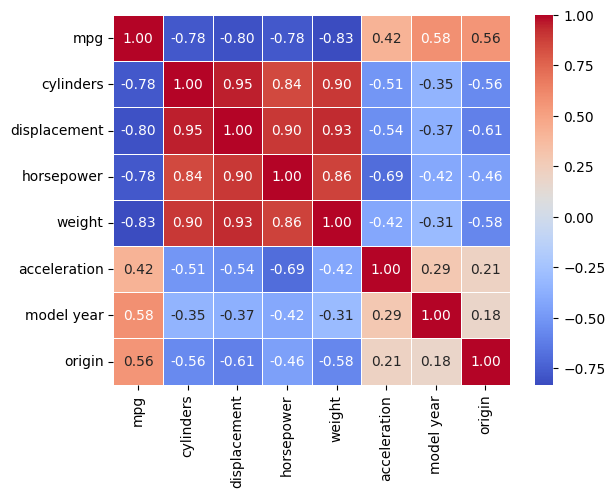

In [24]:
# A4 code goes below
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

C:\Users\alsae\AppData\Local\Temp\ipykernel_16020\1981092764.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)


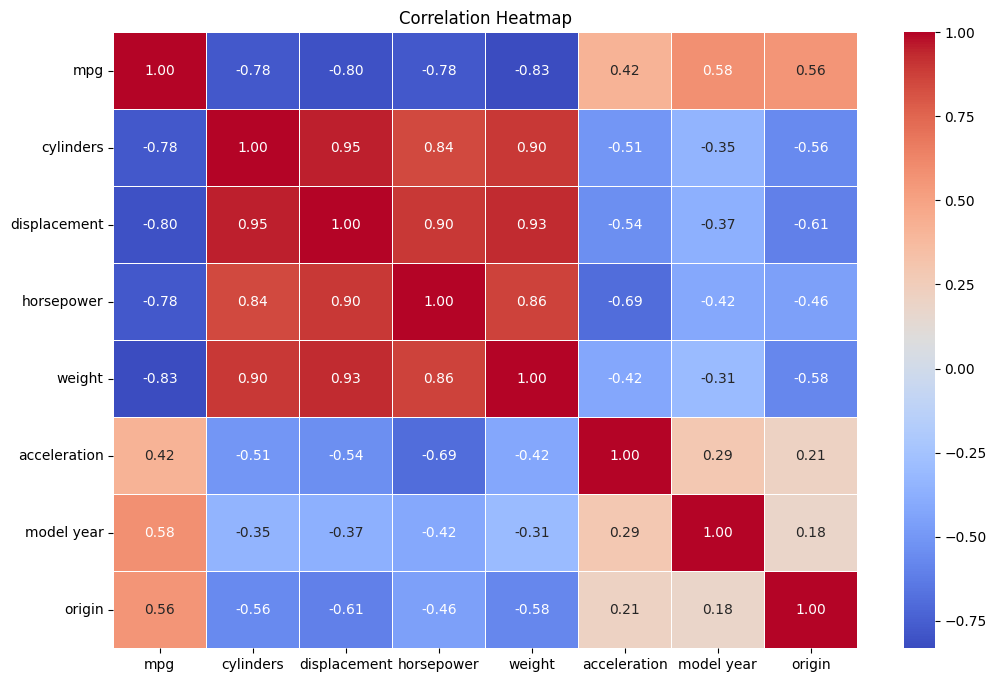

In [25]:
import matplotlib.pyplot as plt

# A4 code goes below
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

**A4**  
the coulmns most related to horse power are displacement horsepower and weight, the bigger the car and the stronger the car the more of an effect that will have on the mpg for example if a car weighs more it will have a lower mpg they have a negtive corrlation ot one another so mpg is dependent on those 3 columns

**Q5** 
1. Draw a lineplot or scattered plot between mpg and your answer from the above cell. 
2. Use pairplot from sns to plot our data frame df for better understanding of your selection 
   * NOTE: 2. should inform 3.
3. Choose a set of columns/ features based on pairplot and heatmap for the mpg prediction.
* Justify your answer using some explanation from the heatmap and pairplot graph formulated from the dataset.

**A5**  For 1. and 2. replace ??? with code in the code cell below.  

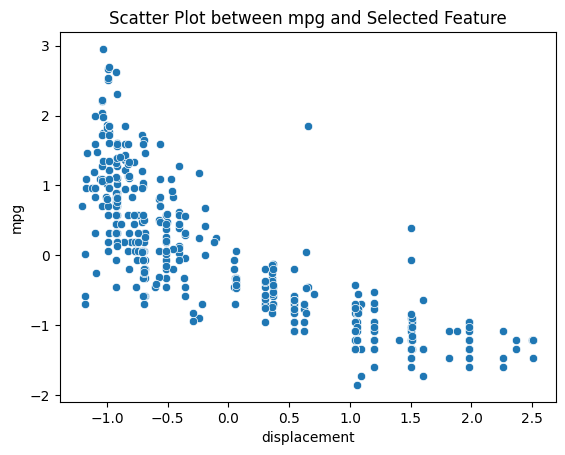

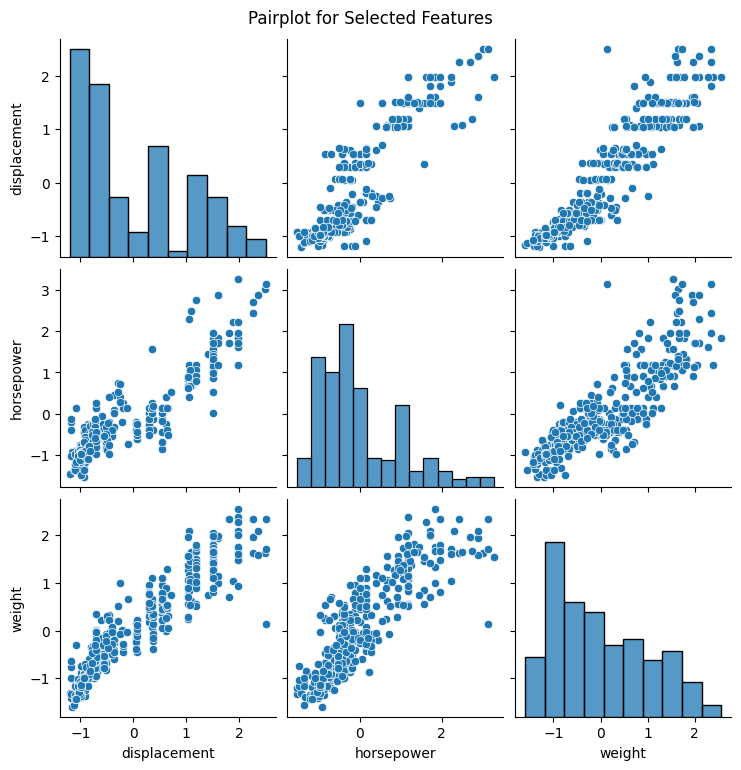

In [26]:
# Draw a lineplot or scattered plot between mpg and your answer from the above cell.
sns.scatterplot(x='displacement', y='mpg', data=df)
plt.title('Scatter Plot between mpg and Selected Feature')
plt.show()

# Use pairplot from sns to plot our data frame df for better understanding of your selection
selected_columns = ["displacement","horsepower","weight"]  # Replace with the columns selected based on heatmap and analysis
sns.pairplot(df[selected_columns])
plt.suptitle('Pairplot for Selected Features', y=1.02)
plt.show()

**A5**  
For 3., write down your explanation here replacing this line

## Data Preparation

**Q7** Assign mpg column value to y and rest columns to x, remember x shouldn't have mpg

**A7** Replace ??? with code in the code cell below

In [27]:
df = df.drop('car name', axis=1)
df.dropna(inplace=True)

In [28]:
y = df['mpg']
x = df.drop('mpg', axis=1)

**Q8** Use train_test_split to split the data set as train:test=(80%:20%) ratio.

**A8** Replace ??? with code in the code cell below

In [29]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

# View the shape of your data sets
print(xtrain.shape, xtest.shape, ytrain.shape, ytest.shape)

(313, 7) (79, 7) (313,) (79,)


**Q9** Follow examples from references given in the top of this notebook  
* Note:Use linear model to fit regression line and plot  
* Our linear model will be of following type  
* Y = b + coef0*x0 + coef1*x1+coef2*x2+............  

**A9:** Replace ??? with code in the code cell below

In [30]:
from sklearn import linear_model

reg = linear_model.LinearRegression()
reg.fit(xtrain,ytrain)

#Now view the coefficient use .coef_ and shape of .coef_
print(reg.coef_)
print(reg.intercept_)
print(reg.coef_.shape[0])

[-0.04424124  0.2015591  -0.10490412 -0.66542926  0.01338978  0.09822724
  0.20643044]
-7.54470861207705
7


**Q10** Relates to the code in the cell below. Why the printed values the same?

In [31]:
# Now if you view 
print(f'{reg.coef_.shape[0]},{xtrain.shape[1]}, ', f'are equal? {reg.coef_.shape[0]==xtrain.shape[1]}')

7,7,  are equal? True


**A10** 
Since each feature corresponds to a coefficient in the linear regression model, the number of coefficients is equal to the number of features

## Model Scoring

In [32]:
# Model Score 
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(xtrain, ytrain)
reg.score(xtest,ytest)

# Calculate the score on train and test sets
# Your code goes below
reg.score(xtrain,ytrain), reg.score(xtest,ytest)

(0.826001578671067, 0.7901500386760345)

**Q11**  Each of the sklearn models have different model evaluations core value.  
* LinearRegression [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)
* More on [model_evaluation](https://scikit-learn.org/stable/modules/model_evaluation.html)

Explain what's the meaning of reg.score return value in this notebook. 

**A11**
Write your answer replacing this line

In [33]:
# A custom function to calculate r2 score
# Details on the custom scorers: https://scikit-learn.org/stable/modules/model_evaluation.html

def r2score_(ytrue, ypred):
  rss = ((ytrue - ypred)**2).sum()
  tss = ((ytrue - ytrue.mean()) ** 2).sum()
  r2 = 1 - rss/tss
  return r2

# Now do prediction on xtrain and xtest and check your r2 score by printing score values 
trainpredict = reg.predict(xtrain)
testpredict = reg.predict(xtest)

print(r2score_(ytrain, trainpredict), r2score_(ytest, testpredict))


0.826001578671067 0.7901500386760345


One way of achieving linear regression is by minimizing the error between actual y and predicted y. The method is known as least square method.  We will make our custom least square optimize to calculate model parameters that minimizes output error.   

**Q12** Write a function which takes weights(or params), x and y and do following
* 1. calculate dot product between x and params , which is ypredicted
* 2. calculate difference between actual y and ypredicted
* 3. return the difference

**A12** complete the code below

In [34]:
import scipy.optimize as optimization
from sklearn.metrics import r2_score

def constraint(params, x, y):
  ypred = x@params
  return y-ypred

# Our initial params is a vector of size equal to dimension of x, or you can say number of columns of x
# You can create zeros vector using np.zeros(size)

# complete code
params = np.zeros(xtrain.shape[1])


# Now study the documentation and complete following code
params, _ = optimization.leastsq(constraint, params, args=(xtrain, ytrain))

# Now we have parameter or weight we can now create our model
model = lambda x:np.dot(x,params)

# Now predict ytrain using model and see first 5 predicted and actual values
ypred_train = model(xtrain)
# see first 5 predicted values
print("Predicted values (train):", ypred_train[:5])
# see first 5 actual values
print("Actual values (train):", ytrain[:5])

# Now predict ytest using model and see first 5 predicted and actual values
ypred_test = model(xtest)
print("Predicted values (test):", ypred_test[:5])
print("Actual values (test):", ytest[:5])

# Now use custom made r2score calculator to calculate r2 score on both train and test set
print(r2score_(ytest, ypred_test), r2score_(ytrain, ypred_train))

# Now use sklearn build-in r2score calculator to calculate r2 score on both train and test set
print("Sklearn R2 Score (test):", r2_score(ytest, ypred_test))
print("Sklearn R2 Score (train):", r2_score(ytrain, ypred_train))

Predicted values (train): [-0.50439732  0.44036088 -0.26803808 -1.32672601  0.91058591]
Actual values (train): 260   -0.628785
184    0.190050
174   -0.705551
64    -1.089379
344    1.981251
Name: mpg, dtype: float64
Predicted values (test): [0.74051289 0.24735134 1.3038697  0.63710714 0.45177571]
Actual values (test): 79     0.317993
276   -0.244956
248    1.610217
56     0.317993
393    0.445936
Name: mpg, dtype: float64
0.6992840760021803 0.7460941337859843
Sklearn R2 Score (test): 0.6992840760021803
Sklearn R2 Score (train): 0.7460941337859843


C:\Users\alsae\AppData\Local\Temp\ipykernel_16020\2269598876.py:26: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  print("Actual values (train):", ytrain[:5])
C:\Users\alsae\AppData\Local\Temp\ipykernel_16020\2269598876.py:31: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  print("Actual values (test):", ytest[:5])
